In [1]:
import numpy as np
import matplotlib.pyplot as plt
from solvers import jax_poiseuille_solver, convection_diffusion_solver, u_converge
from gif_creation import anim_result, generate_init

In [2]:
# Время
time = 100

#Граничные условия для течения Пуазейля (не 0 если надо течение Куэтта)
BC = [0,0]

#Вязкость
mu = 1

# Константа диффузии
a = 0.1

# Давление на левой границе
Pl = 20

# Давление на правой границе
Pr = 10

# Длина трубы
L = 9/1.5

# Ширина трубы
H = 13/2

# Число шагов по Oy
Nysteps = 12

# Градиент давления
press_grad = (Pr - Pl)/L

In [3]:
# Подсчёт скорости течения Пуазейля
u = jax_poiseuille_solver(Pr, Pl, H, L, Nysteps, mu, BC)
u = u_converge(Pr, Pl, mu, a, u, H, L, BC)

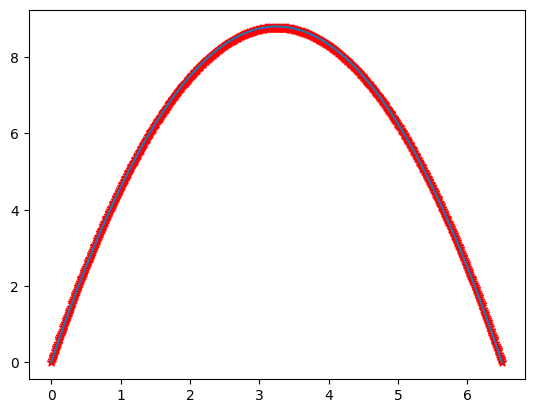

In [4]:
# Аналитическое решение, сравнение с результатом функции
y = np.linspace(0,H,u.shape[0])
analytical_solution = press_grad*y**2/2/mu + ((BC[1]-BC[0])/H - press_grad*H/2/mu)*y + BC[0]
visualize_frequency = 1
plt.scatter(y[::visualize_frequency],u[::visualize_frequency],marker='*',c='red')
plt.plot(y,analytical_solution)

(596, 551)


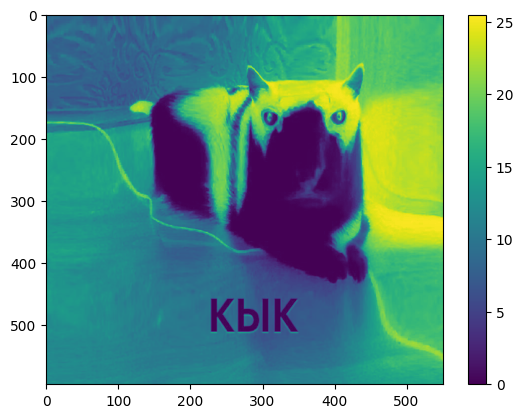

In [10]:
# Генерация поля начальных условий из картинки
path = 'IC_pictures/кык.jpg'
cat = generate_init(path, int(L/H*u.shape[0]+1), u.shape[0], 10, True)
plt.imshow(cat, aspect='auto')
plt.colorbar()
print (cat.shape)
cat[0,:]=0
cat[-1,:]=0
cat[:,0]=0
cat[:,-1]=0

In [11]:
# Создание куба полей концентрации
time = 10
c, timestep = convection_diffusion_solver(cat, H, L, time/2, u, a)
print (c.shape)

  0%|          | 0/2499 [00:00<?, ?it/s]

(2500, 596, 551)


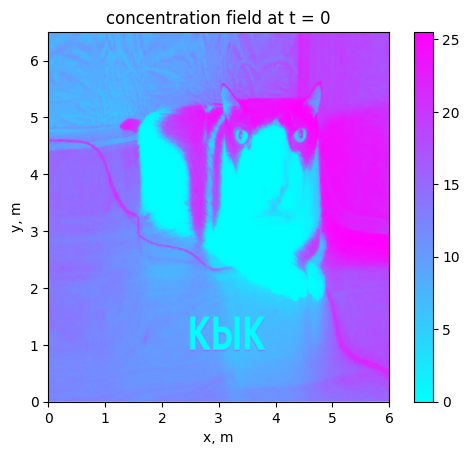

In [12]:
# Создание .gif изображения
anim_result(c, timestep, L, H, picture=True, showMe=True, colour='cool')